# Project 6  - Dimensionality Reduction with PCA

In the Exploratory Data Analysis (EDA), we have seen that some variables might be correlated to one another. A robust model is a simple model, which means that we want to keep only the information necessary (i.e., to predict whether a banknote is fake or genuine) by removing redundancy. For that purpose, in this notebook, we will perform a principal component analysis (PCA). The PCA is used to reduce the dimension of the features available by creating composite variables orthogonal to each other (i.e., independent and not correlated). 

This notebook include all the following steps:

    ✅ Scree Plot Analysis
    ✅ Factorial Plans with PCs
    ✅ 2D Projection of individuals
    ✅ Quality Analysis of the PCA and contributions of each variables
    ✅ Selection of the best component variable

After the EDA, We have now 2 datasets:

- with outliers
- without outliers

We want to know if filtering out the outliers from the dataset positively impacts our final model's accuracy. For this reason, all the following steps will be applied to both datasets.  

## Get started

In [211]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns
%matplotlib inline

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [212]:
# Dataset with outliers
df1 = pd.read_csv(Path.cwd()/'dataset.csv',index_col=0)
df1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [213]:
# Dataset without outliers
df2 = pd.read_csv(Path.cwd()/'dataset_cleaned.csv',index_col=0)
df2.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
5,True,172.57,104.65,104.44,4.54,2.99,113.16
6,True,172.38,103.55,103.80,3.97,2.90,113.30


## Pre-processing

All the datasets' variables are expressed in the same units: millimeters. Nonetheless, scaling the variables is essential before applying the PCA because the range varies slightly between the variables.

For example:
- Margin range between 0.2 and 6
- Diagonal range between 172 and 174

As a result, even if all units are expressed in the same units, diagonal might weigh more in the model than margin. 
Data standardization procedures equalize the range and smooth the variability.

In [214]:
# Extract features, values and target 

# dataset with outliers
features1 = df1.iloc[:,1:].columns
y1 =  df1['is_genuine'].values #labels
mask1 = df1.columns[1:]
X1 = df1[mask1]

# dataset without outliers
features2 = df2.iloc[:,1:].columns
y2 =  df2['is_genuine'].values
mask2 = df2.columns[1:]
X2 = df2[mask2]

# Standardization
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)
X_scaled2 = scaler.fit_transform(X2)

## PCA

In [215]:
# Apply the algorithm 
pca = PCA()
X_PCA1 = df1.copy()
X_PCA1[mask1] = pca.fit_transform(X_scaled1) #with outliers

In [216]:
X_PCA1

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,2.153639,1.599709,1.787451,2.433465,0.699690,-1.267702
1,True,-2.110416,-0.526039,0.542563,0.344550,0.067440,-0.544601
2,True,-1.973152,-0.048102,0.858716,0.374812,-0.424886,0.080487
3,True,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,-0.038261
4,True,-2.403180,0.412170,3.319507,-0.837043,-0.420151,-0.445099
...,...,...,...,...,...,...,...
165,False,2.478626,0.189974,-0.814598,0.107861,-0.899828,0.093078
166,False,2.585331,2.914472,0.586789,-2.183704,0.274577,-0.509206
167,False,2.067245,0.845602,-0.610282,-1.714172,0.116958,-0.504338
168,False,0.739257,-0.972965,-1.359772,-0.191736,-0.243557,0.211429


## Scree plot

Remember that the main idea behind PCA is that most of the variance hold in high-dimensional data can be captured in a lower-dimensional subset composed by few principal components. 
Reducing the dimension is therefore based on choosing the right number of principal components to retain.  

A scree plot displays how much variance each principal components (PCs) captures from the data. It is a good visualization to check wether or not the PCA worked well. Ideally, the 1st component will capture the most variance, then the second one, and so on. 
The y axis is eigenvalues, which essentially stand for the amount of variance explained. 

- We can use this plot to select which PCs to keep according to the percentage of variance explained

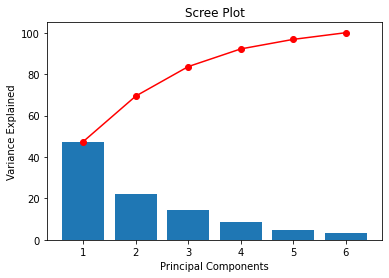

In [217]:
# Create visual
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show(block=False)

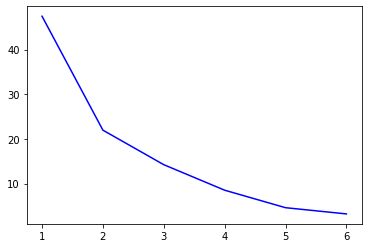

In [218]:
# Focus on the elbow
plt.plot(np.arange(len(scree))+1, scree,c="blue")
plt.show()

In [219]:
# Get eigenvalues for each components
print(pca.explained_variance_ratio_)

[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


<div class="alert alert-block alert-info"> 
The first two components capture about 70% of the variance which is pretty low.
To select the number of PC to keep, in that case, we could use these rules of thumbs:

- Pick PCs with eigenvalues of at least 10%.
- The selected PCs should be able to describe at least 82% of the variance.
    
Based on the scree plot, we decide to keep the first 3 components as they capture about 83% of the variance which is relatively good. 
    
Generally speaking, if we end up with too many PCs (let's say more than 3), PCA might not be the best way to visualize your data. Other dimension reduction techniques might be preferred such as:

- t-SNE 
- MDS

References: 
- https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
- https://stats.stackexchange.com/questions/223450/t-sne-versus-mds
    
</div>

In [220]:
# Apply the algorithm on the cleaned dataset
pca2 = PCA() 
X_PCA2 = df2.copy()
X_PCA2[mask2] = pca2.fit_transform(X_scaled2)

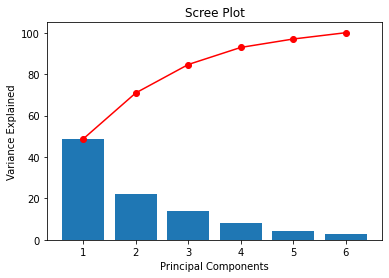

In [221]:
# Create visual
scree = pca2.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show(block=False)

In [222]:
# Get eigenvalues for each components
print(pca2.explained_variance_ratio_)

[0.48744955 0.22176634 0.1372101  0.08244204 0.04071787 0.03041411]


<div class="alert alert-block alert-info"> Similarly, we can see that keeping the first 3 PCs is enough to hit 82% of the variance explained.
    We can also notice that we can reach 85% of variance explained with the first 3 PCs on the cleaned dataset VS 83% on the dataset with outliers. The next steps might confirm (or not) the necessity of working with a cleaned dataset.      
</div>

## Loadings Plots

The loadings can be understood as the weights for each original variable when calculating the principal component. Hence. the loadings plot shows the influence of each variable in a principal component. 

In [223]:
# Function to display the loading plots
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(7,6))

            # Settings Plot Limits
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Display Arrows
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),pcs[d1,:], pcs[d2,:], angles='xy', scale_units='xy', scale=1, color="grey")
                #(https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            
            # Labelling variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='9', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # Display circles
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display horizontal & vertical lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Labelling axis
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            
            # Labelling plot
            plt.title("Loading Plot (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)        

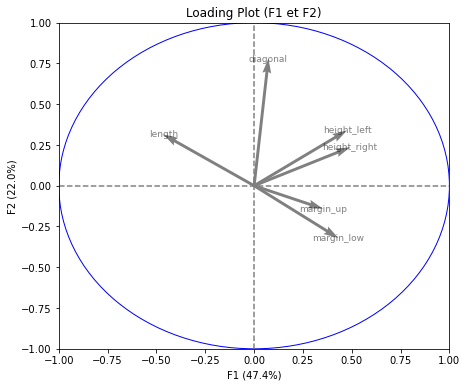

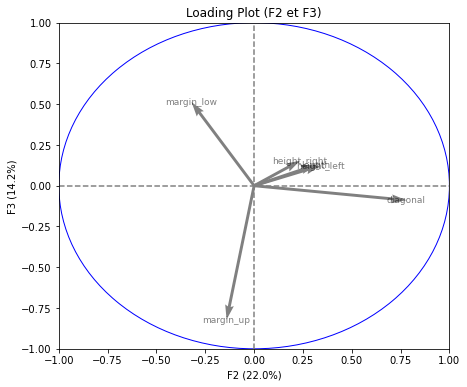

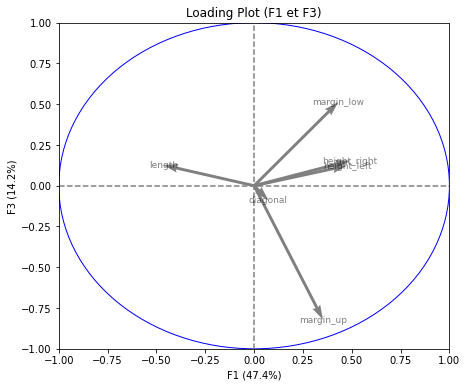

In [224]:
# Create Loadings Plots
pcs = pca.components_
display_circles(pcs, 6, pca, [(0,1),(1,2),(0,2)], labels = np.array(features1))

<div class='alert alert-block alert-info'> 

- F1 is representative of all variables except diagonal. Length is the only original feature that is negatively correlated to this plan.
- F2 is mostly representative of diagonal. The other features have a low weight (about 30%) in comparison.
- F3 is mostly representative of margin_up (negatively correlated to this plan), followed by margin_low. The other features have a very low weight (about 10%) in comparison. 

We can also encompass some of the observations made within the EDA about how the variables are correlated to each other. 
    
For example:
- height_left and height_right are strongly correlated to each other: the two vectors are close in each plans.
- length and margin_low/up are negatively correlated if we look from the plans F1-F2
- length and height_left/right are correlated if we look from the plans F2-F3

However, the correlation suspected during the EDA between:
- margin_up/low and height_left/right, are not convincing on the loadings plots.
</div>

In [225]:
# Let's interpret the 3 PCs of the cleaned dataset in another way

# dataset without outliers
F1 = pca2.components_[0]
F2 = pca2.components_[1]
F3 = pca2.components_[2]

pd.DataFrame({'F1':F1,'F2':F2,'F3':F3}, np.array(features2))

,P1,P2,P3
diagonal,0.062998,0.791677,0.048628
height_left,0.474882,0.347826,-0.143165
height_right,0.490822,0.208168,-0.158193
margin_low,0.433202,-0.335449,-0.497521
margin_up,0.360157,-0.102346,0.829448
length,-0.460690,0.293138,-0.128856


<div class='alert alert-block alert-info'> The impact of the cleaning is noticeable only for the plan F3. The importance of each variables is comparable to what we have seen before. What changed is the sign of the correlation with the plan F3: when it was positively correlated to F3 on the dataset with outliers, it is now negatively correlated on the dataset without outliers; and vice-versa. 

For the plan F1 and F2 we can make similar observations than for the dataset with outliers.
</div>

## Scores plots

The score plots indicate the projection of the data onto the span of the principal components. 
As in the previous section, this 3-dimensional set results in 3 score plots, one for each pairwise combination of PCs. 
We are using the field is_genuine (fake/genuine) as a label for our data to see if we can detect a pattern in the 3 different combination of PCs

Tips: If the first two components account for most of the variance in the data, you can use the score plot to assess the data structure and detect clusters, outliers, and trends. Groupings of data on the plot may indicate two or more separate distributions in the data. If the data follow a normal distribution and no outliers are present, the points are randomly distributed around zero.

References: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/

In [226]:
def display_score_plot(df, n_comp, pca, axis_ranks,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig, ax = plt.subplots(figsize=(15,9))
        
            # Plot
            ax.scatter(x=df[:, d1], y=df[:, d2],alpha=alpha, marker=marker,c=labels,cmap='coolwarm') 
            
            # Labels
            for i,(x,y) in enumerate(df[:,[d1,d2]]):
                plt.text(x, y, labels[i],fontsize='8', ha='center',va='top', color='black')

            
            # axis names with %explained variance
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-3, 3], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-3, 3], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title("Score Plots on (F{} & F{})".format(d1+1, d2+1))
            plt.show(block=False)

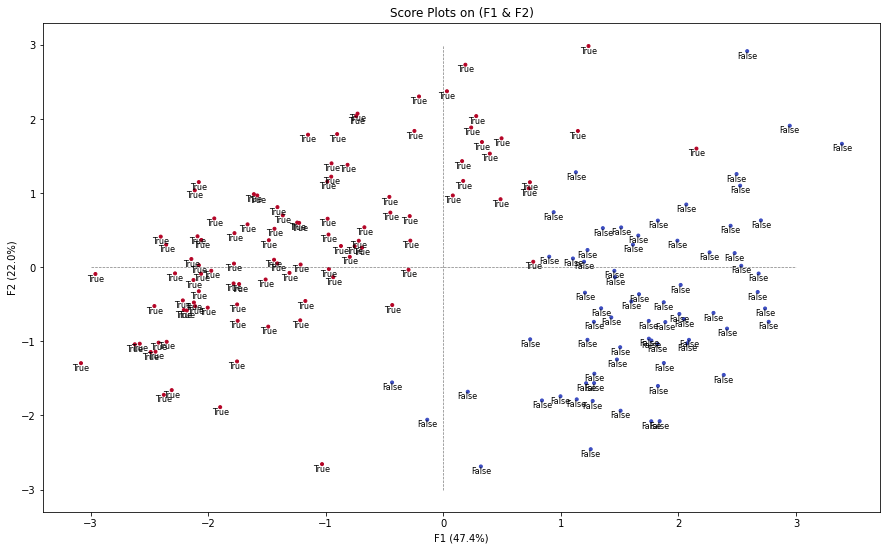

In [235]:
# Creating the score plots for the dataset with outliers: F1 vs F2
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(0,1)], labels=y1, marker='.')

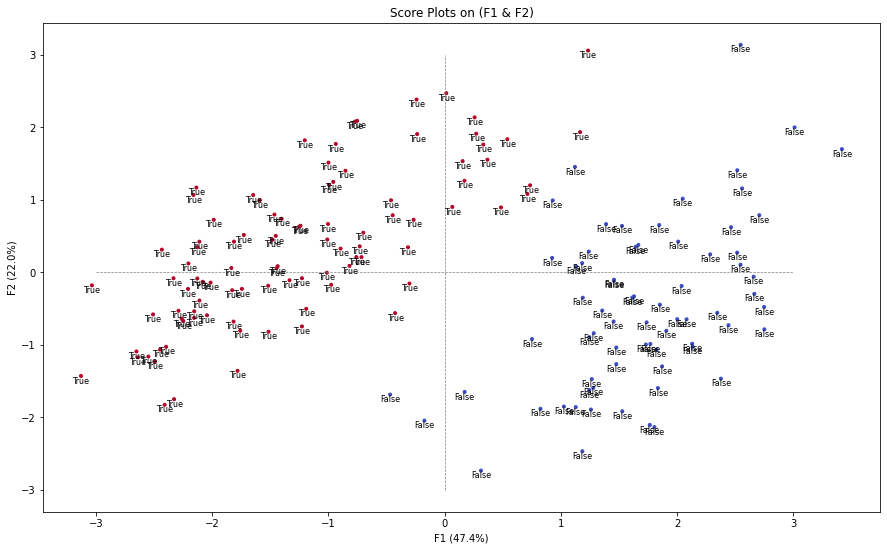

In [236]:
# Creating the score plots for the dataset without outliers: F1 vs F2
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(0,1)], labels=y2, marker='.')

<div class='alert alert-block alert-info'> When we look from the plan F1, the separation between the fake banknotes and the genuine banknotes is relatively clean and clear. 
We can notice that the outliers at the bottom left quadran of the plot, disappeared after cleaning the dataset. 

</div>

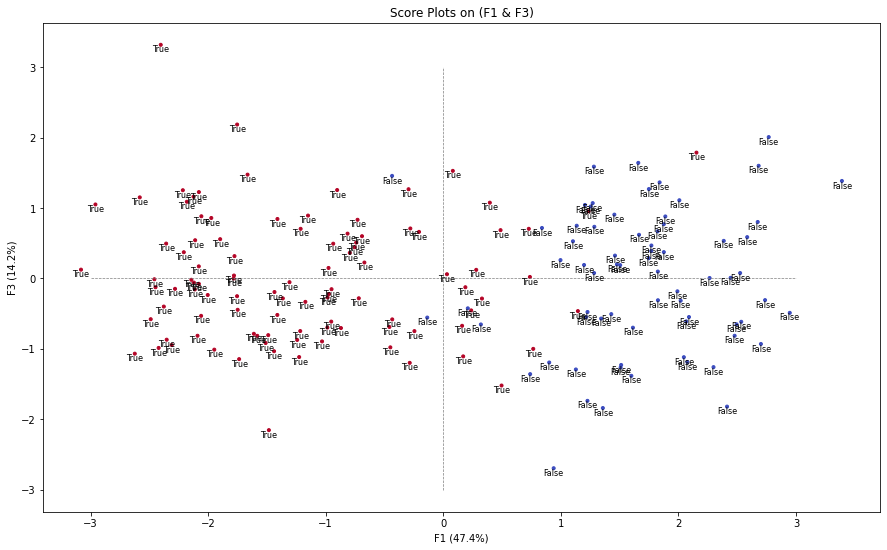

In [237]:
# Creating the score plots for the dataset with outliers: F1 vs F3
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(0,2)], labels=y1, marker='.')

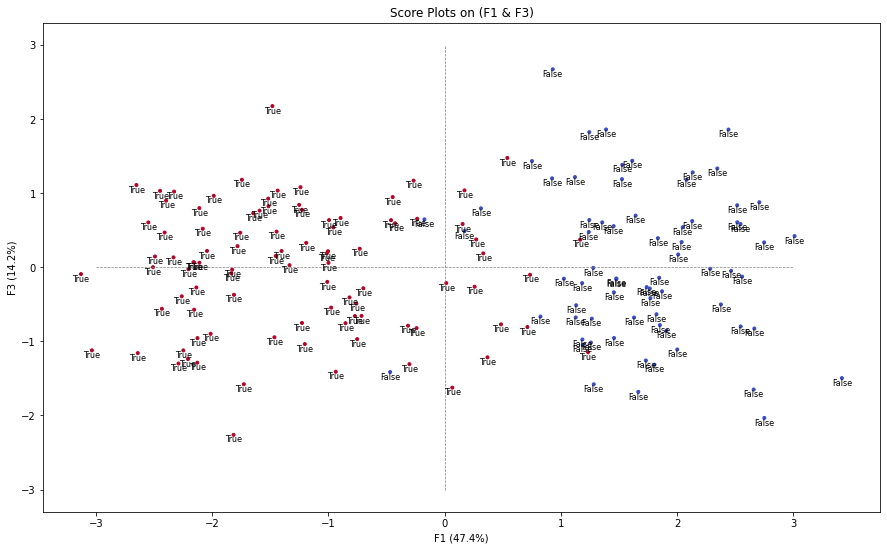

In [238]:
# Creating the score plots for the dataset without outliers: F1 vs F3
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(0,2)], labels=y2, marker='.')

<div class='alert alert-block alert-info'> Same observations than before: the separation between the 2 sets is relatively clear on the plan F1. 
    We can notice that the on the "genuine" banknotes set, the cleaning step removed the outliers in the top-left quadran. 

</div>

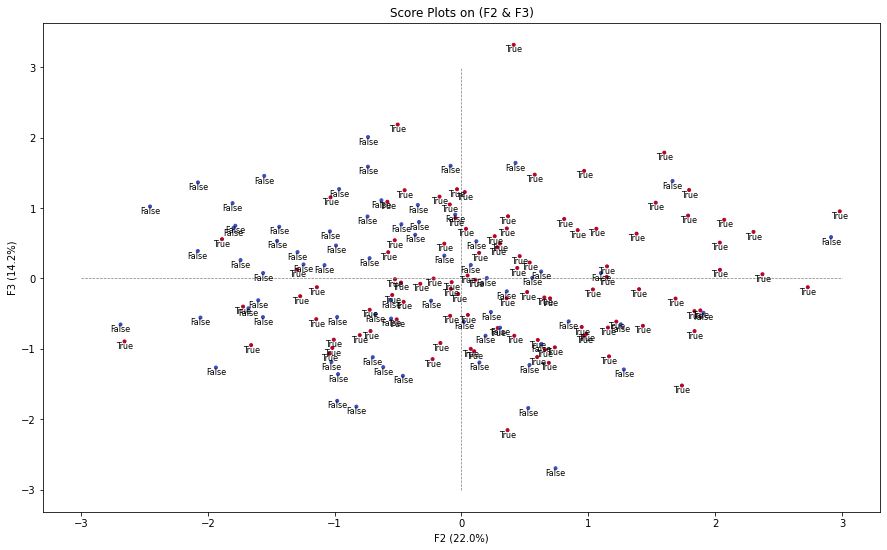

In [239]:
# Creating the score plots for the dataset with outliers: F2 vs F3
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(1,2)],labels=y1, marker='.')

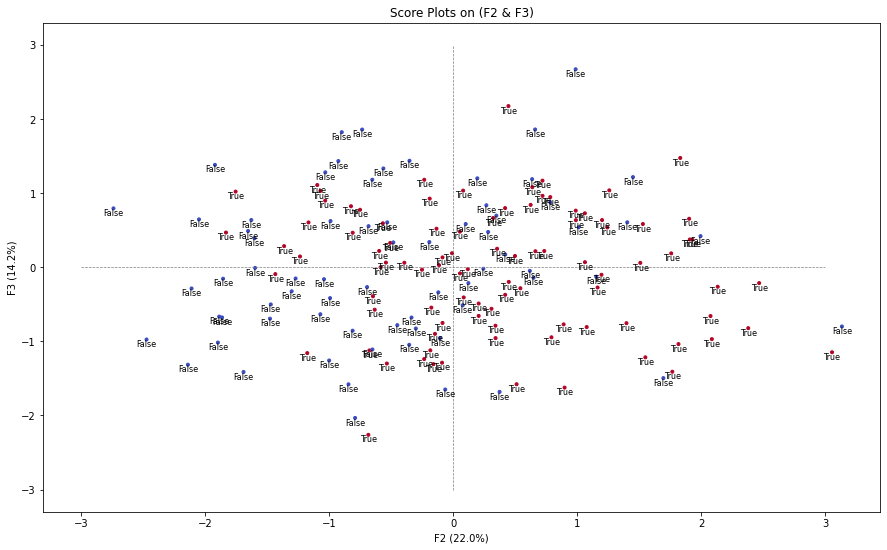

In [240]:
# Creating the score plots for the dataset without outliers: F2 vs F3
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(1,2)],labels=y2, marker='.')

<div class='alert alert-block alert-info'> As expected with the scores (22+14 = 36% of variance explained), the last projection is not highly relevant to separate our data in 2 groups and differenciate the genuine banknotes to the fake ones. The data points are grouped around the center of the plot and mixed together. However, we can notice that there are a bit more fake banknotes to the left of the projection and a bit more of genuine banknotes to the right of the projection.

</div>


Now that we have selected our 3 principal components, we can move to the next step which consists of creating a model to detect the fake banknotes.
We will start this work by using an unsupervised machine learning algorithm to evaluate the properties of the population and see if we can extract some key characterics of the 2 groups (genuine vs fake).
Then, we will use a Logistic Regression based model to create the counterfeit banknote detection model. 


In [242]:
# Export the output for the next step (PCA)
X_PCA2.to_csv(Path.cwd()/'PCA_cleaned.csv')
X_PCA1.to_csv(Path.cwd()/'PCA.csv')